# Setup

In [35]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
# load data from raw dir
df_game_reviews = pd.read_csv(r'../data/processed/game_reviews_processed.csv', low_memory=False)

In [37]:
#subset english-only revies
df_game_reviews_english = df_game_reviews[df_game_reviews['language']=='english']

#subset only labled data (from previous week) 
#df_game_reviews_english = df_game_reviews_english.loc[df_game_reviews_english['Emotion'].notnull(), ['Emotion', 'review' ]]

In [38]:
df_game_reviews_english

,recommendationid,language,Valence Intensity,Joy Intensity,Anger Intensity,Fear Intensity,Sadness Intensity,Sentiment,Emotion,review,...,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102
1,71182712,english,0.382,0.197,0.447,0.441,0.530,Negative,Sadness,Game is fun and exciting when it works. Very s...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,26578229,english,0.539,0.368,0.389,0.367,0.329,Positive,Joy,Excellent game. \r\n\r\nPlenty of fun to be ha...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,71178247,english,0.424,0.259,0.494,0.401,0.381,Negative,Anger,Players are too serious and you can't have fun...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,71177738,english,0.622,0.510,0.260,0.199,0.189,Positive,Joy,great simulation game,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,71176801,english,0.521,0.379,0.383,0.422,0.416,Positive,Joy,A blast of a game.\r\nAlso a blast of a grenad...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51316,19708009,english,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Communication and teamplay is one of the best ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51317,19708002,english,NaN,NaN,NaN,NaN,NaN,NaN,NaN,If you're looking for a realistic mil-sim styl...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51318,19707993,english,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ITS THE BEST GAME EVERS \r\n\r\nPlay this game...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51319,19707992,english,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(Disclaimer: This game used to not be on Steam...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1. Apply K-Means to data you have collected and cleaned with k=5.

In [39]:
#feature extraction
vec = TfidfVectorizer(stop_words="english")
vec.fit(df_game_reviews_english.review.values.astype(str))
features = vec.transform(df_game_reviews_english.review.values.astype(str))

In [40]:
#generate model
cls = MiniBatchKMeans(n_clusters=5, random_state=42)
cls.fit(features)

MiniBatchKMeans(n_clusters=5, random_state=42)

In [41]:
#predict clusters
# predict cluster labels for new dataset
cls.predict(features)

# to get cluster labels for the dataset used while
# training the model (used for models that does not
# support prediction on new dataset).
cls.labels_

array([2, 2, 4, ..., 2, 1, 1])

In [42]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=42)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

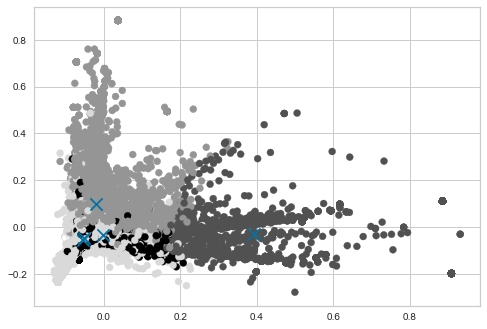

In [43]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

In [44]:
#eval w/o labels

#The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. 
#The Silhouette Coefficient for a sample is (b - a) / max(a,b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.

#The best value is 1 and the worst value is -1. 
#Values near 0 indicate overlapping clusters. 
#Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

silhouette_score(features, labels=cls.predict(features))

0.015041196251705415

# 2. Use silhouette or elbow method to find k and recluster your data.

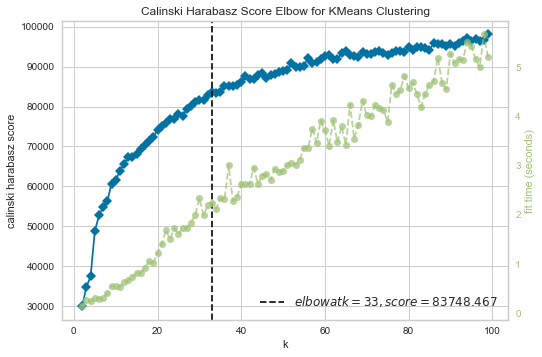

In [48]:
# instantiate the clustering model and visualizer, elbow method
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,100), metric='calinski_harabasz')

visualizer.fit(reduced_features)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# 3. Compare the clustering results from both. Do the clusters make sense? Which performed better? 

If I'm interpreting the above correclty, my game reviews have (roughly) 33 different types of reviews. What I would need to do is look at the actual reviews, separately, perhaps 1 review from the center of each cluster to see if there's really anything going on here.

Feedback from week 5:
    
"Hey Carl,

Good job on the homework. I am more of a Keras person so PyTorch is a bit unfamilair to me. Looking at your code it looks like you ran eight iterations of training. For larger neural nets it is common and easy to run training for 20-100k if not more iterations with checkpoints every 1k for for first 10k and then every 5k-10k to check accuracy.  Let me know if I misread the code and you are not using a NN."


That's correct it's a NN. The training took me like 18 hours or something like that, on a 1080ti. Before settling on that training period I graphed 4/5 epochs and saw diminishing returns. So I settled on 8. My goal that week was to find the limits of adding training data to my set, and I think I found it :)

If I use that model in the future, I'll drop the additional training data and increase my epochs. Question about epoch count: in my Intro to ML and NNs course with Dr. Labidi for fun I left a training cycle up for like 4 days to see if I could obseve over fitting. How many cycles would you expect my set to take to over-fit? Is there a general rule-of-thumb in NLP for over-fitting? 